# HW5_Assignment1

## Null Hypothesis: 
## H0: a gaussian model fits for the age distribution of citibike drivers
## I set a statistical significance of 0.05

In [54]:
#download file
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os
import scipy.stats

datestring = '201606'
df=pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')

Populating the interactive namespace from numpy and matplotlib


In [55]:
df['age'] = 2016 - df['birth year']

In [56]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,age
0,1470,6/1/2016 00:00:18,6/1/2016 00:24:48,380,W 4 St & 7 Ave S,40.734011,-74.002939,3236,W 42 St & Dyer Ave,40.758985,-73.993800,19859,Subscriber,1972.0,1,44.0
1,229,6/1/2016 00:00:20,6/1/2016 00:04:09,3092,Berry St & N 8 St,40.719009,-73.958525,3103,N 11 St & Wythe Ave,40.721533,-73.957824,16233,Subscriber,1967.0,1,49.0
2,344,6/1/2016 00:00:21,6/1/2016 00:06:06,449,W 52 St & 9 Ave,40.764618,-73.987895,469,Broadway & W 53 St,40.763441,-73.982681,22397,Subscriber,1989.0,1,27.0
3,1120,6/1/2016 00:00:28,6/1/2016 00:19:09,522,E 51 St & Lexington Ave,40.757148,-73.972078,401,Allen St & Rivington St,40.720196,-73.989978,16231,Subscriber,1991.0,1,25.0
4,229,6/1/2016 00:00:53,6/1/2016 00:04:42,335,Washington Pl & Broadway,40.729039,-73.994046,285,Broadway & E 14 St,40.734546,-73.990741,15400,Subscriber,1989.0,1,27.0


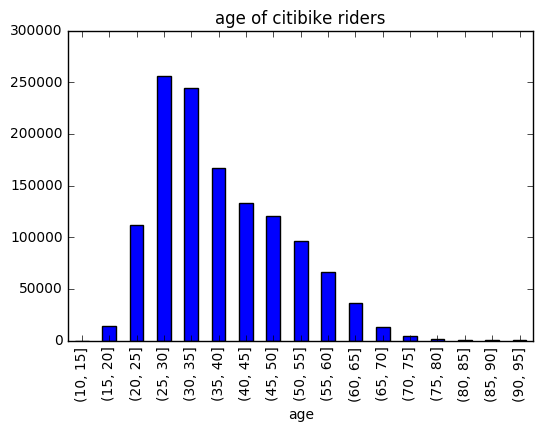

In [7]:
bins = np.arange(10, 99, 5)
ax = df.age.groupby(pd.cut(df.age, bins)).agg([count_nonzero]).plot(kind='bar', legend=False)
ax.set_title("age of citibike riders")

          count_nonzero
age                    
(10, 15]       0.000000
(15, 20]       0.011473
(20, 25]       0.099788
(25, 30]       0.302594
(30, 35]       0.495771
(35, 40]       0.627440
(40, 45]       0.732912
(45, 50]       0.828074
(50, 55]       0.903979
(55, 60]       0.956265
(60, 65]       0.984927
(65, 70]       0.995264
(70, 75]       0.998985
(75, 80]       0.999792
(80, 85]       0.999947
(85, 90]       0.999960
(90, 95]       1.000000


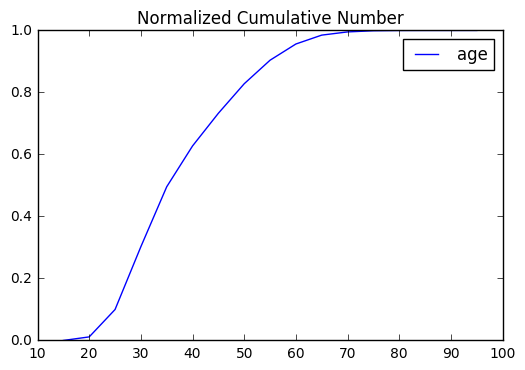

In [61]:
# data clearance
df['age'].dropna(inplace= True)

# cumulative distribution
cs=df.age.groupby(pd.cut(df.age, bins)).agg([count_nonzero]).cumsum()
print (np.abs(cs / cs.max()))

pl.plot(bins[:-1] + 5, cs / cs.max(), label = "age")
pl.title("Normalized Cumulative Number")
pl.legend()

KS Test

In [30]:
from scipy import stats

In [48]:
stats.kstest(df.age, 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

AD Test

In [44]:
scipy.stats.anderson(x, dist = 'norm')

AndersonResult(statistic=20106.901539644226, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))